In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, BatchNormalization
from tensorflow.keras.models import Model

In [4]:
# !wget https://lazyprogrammer.me/course_files/spam.csv

In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# dropa as colunas desnecessárias
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# renomeia as colunas
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# cria labels binários pra ser o input do modelo
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [9]:
# divide os dados
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [10]:
# converte as sentenças em sequencias
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [11]:
# pega a palavra e mapeia pra um número
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'{V} tokens')

7190 tokens


In [12]:
# padding para ter sequencias do mesmo tamanho
data_train = pad_sequences(sequences_train)
print(f'shape de data train: {data_train.shape}')

# pega o tamanho da sequencia
T = data_train.shape[1]

shape de data train: (3733, 189)


In [13]:
data_test = pad_sequences(sequences_test, maxlen=T)
print(f'shape de data test: {data_test.shape}')

shape de data test: (1839, 189)


In [14]:
# cria o modelo

# dimensao
D = 20

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = BatchNormalization()(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [15]:
# compila e fita
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

r = model.fit(
    data_train,
    Ytrain,
    epochs=5,
    validation_data=(data_test, Ytest)
)

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8796 - loss: 0.5209 - val_accuracy: 0.1430 - val_loss: 0.7160
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9805 - loss: 0.0723 - val_accuracy: 0.1446 - val_loss: 0.7639
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9974 - loss: 0.0173 - val_accuracy: 0.7183 - val_loss: 0.5886
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9358 - val_loss: 0.3089
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9994 - loss: 0.0071 - val_accuracy: 0.9668 - val_loss: 0.1061


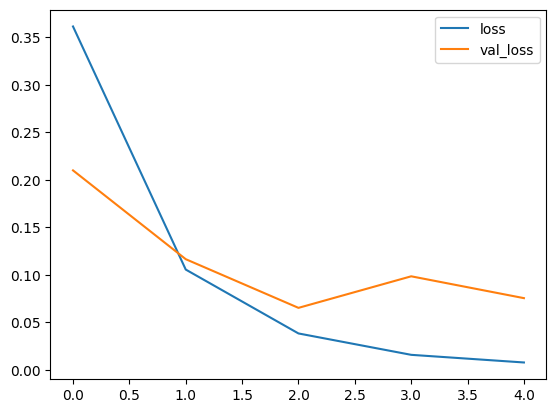

In [28]:
# plota pelo loss SEM O BATCH NORMALIZATION
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

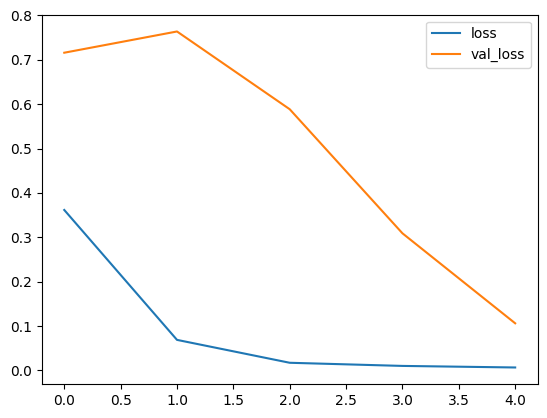

In [16]:
# com batch normalization
# apos adicionar o batch normalization após cada etapa, foi visto uma melhoria siginificatica no modelo

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

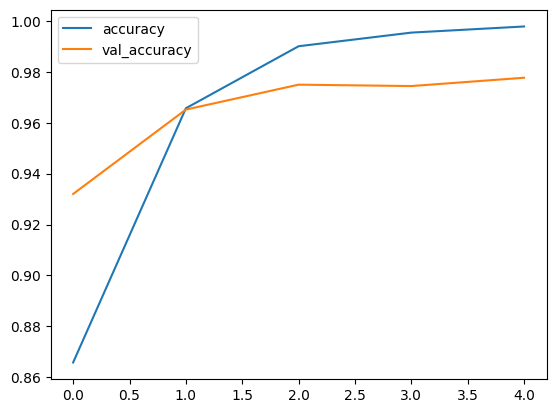

In [29]:
# pela precisão sem batch normalization
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

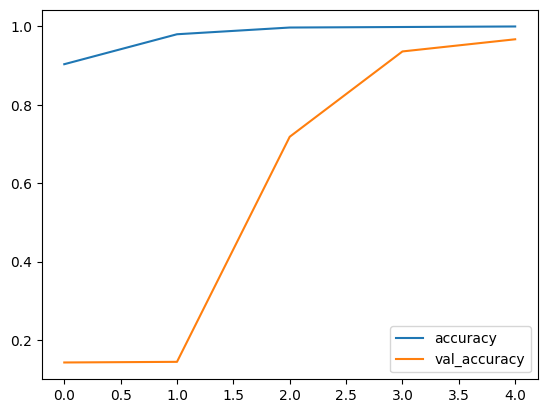

In [17]:
# com batch normalization

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()